In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

In [2]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'figure.figsize': (12, 8)})

In [3]:
df_app = pd.read_csv('applicant_data_clean.csv')
df_app.head()

,applicant,treatment,age,female,bachelors_or_higher,grad_degree,employed_fulltime,eval_correct,noneval_correct,avatar,promote1,promote2,promote3_attentive,promote3_boastful,study_topic_guess,male_avg_answers_guess,female_avg_answers_guess,credibility_of_100,counterfactual_promote,self_promote_reason
0,dvemde5f,1,29,0,1,0,True,7,5,male3,4,70,1,0,How people judge other's judgement of themselves?,6.0,6.0,4,4,To be braggy seems like a con rather than a pro
1,gm8xgrse,2,39,0,1,0,True,4,7,male1,4,64,1,0,no idea,5.0,5.0,2,4,it was fine
2,1b3kjcld,1,70,0,1,0,True,6,6,male3,5,85,1,0,estimation and intelligence,5.0,6.0,3,5,because I guessed on some questions
3,ak3qzuq8,3,43,0,1,0,True,5,3,male1,3,47,1,0,Different opinions about other workers,5.0,5.0,3,3,I had a hard time on the questions
4,i4ccwg2q,1,29,0,1,0,True,5,10,male1,4,73,0,1,To see how evaluations of profile traits will ...,8.0,8.0,1,4,"I did not want my resume to come off as fake, ..."


In [4]:
def plot_ecdf(female_scores, male_scores):
    sns.ecdfplot(female_scores, label = 'Females', color = 'red')
    sns.ecdfplot(male_scores, label = 'Males', linestyle = '--', color = 'blue')
    
    plt.legend()

    # tests to determine if male and female distributions are the same
    # null of ks test is that the distributions are the same
    ks_res = stats.ks_2samp(female_scores, male_scores)
    # null of 2-sample t test is that means are the same
    t_res = stats.ttest_ind(female_scores, male_scores)

    plt.text(
        max(female_scores.max(), male_scores.max()), 0.05,
        f'KS test: p = {ks_res.pvalue:.3f}\nt test (means): p = {t_res.pvalue:.3f}',
        horizontalalignment='right',
    )

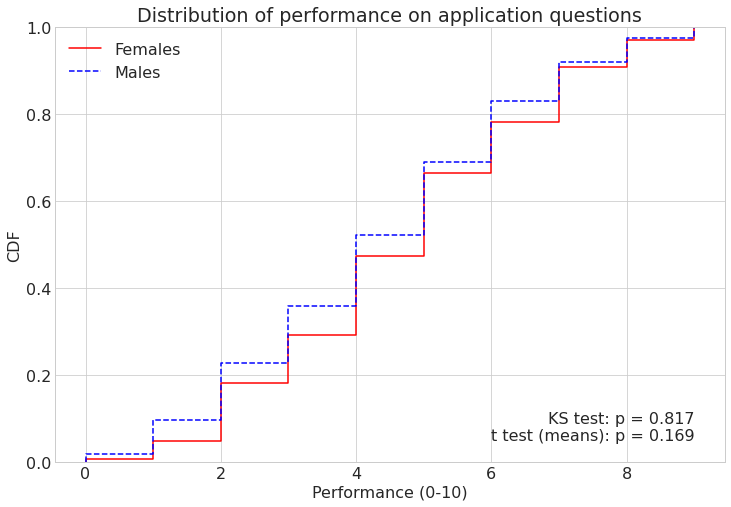

In [5]:
plot_ecdf(
    df_app['eval_correct'][df_app['female'] == 1],
    df_app['eval_correct'][df_app['female'] == 0]
)

plt.title('Distribution of performance on application questions')
plt.xlabel('Performance (0-10)')
plt.ylabel('CDF')

plt.show()

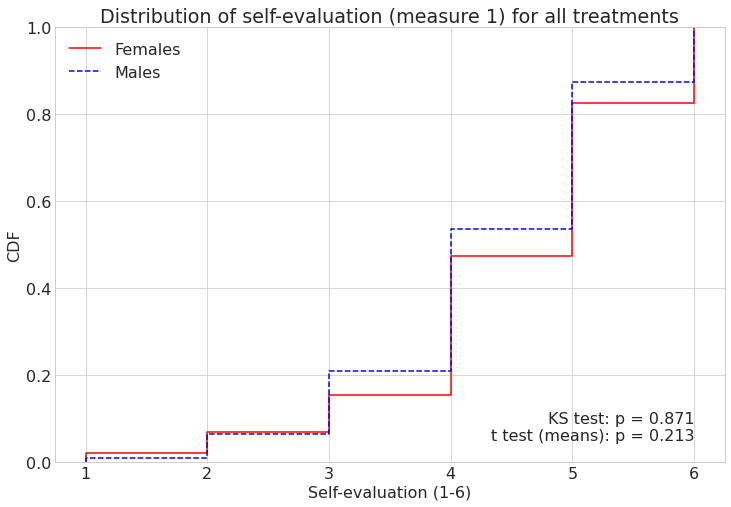

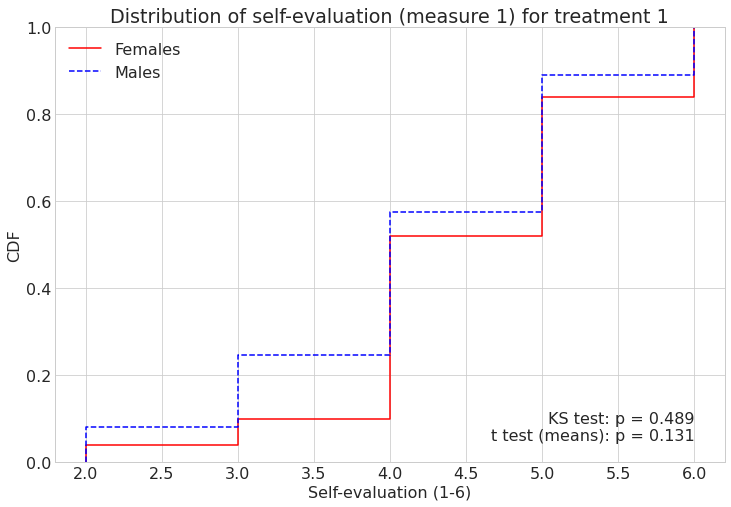

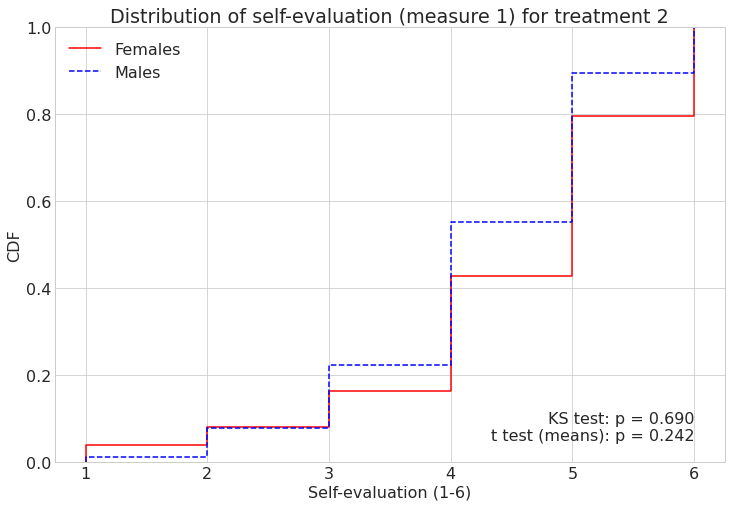

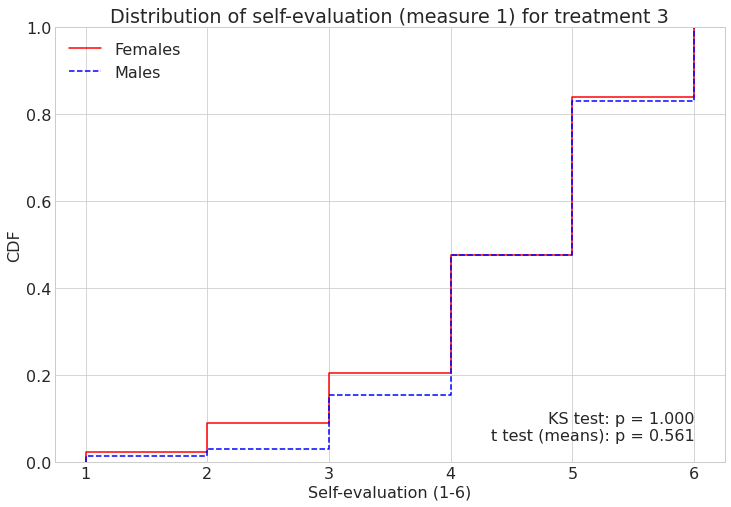

In [6]:
plot_ecdf(
        df_app['promote1'][df_app['female'] == 1],
        df_app['promote1'][df_app['female'] == 0],
    )
plt.title(f'Distribution of self-evaluation (measure 1) for all treatments')
plt.xlabel('Self-evaluation (1-6)')
plt.ylabel('CDF')
plt.show()

for treatment in (1,2,3):
    plot_ecdf(
        df_app['promote1'][(df_app['treatment'] == treatment) & (df_app['female'] == 1)],
        df_app['promote1'][(df_app['treatment'] == treatment) & (df_app['female'] == 0)],
    )
    plt.title(f'Distribution of self-evaluation (measure 1) for treatment {treatment}')
    plt.xlabel('Self-evaluation (1-6)')
    plt.ylabel('CDF')
    plt.show()

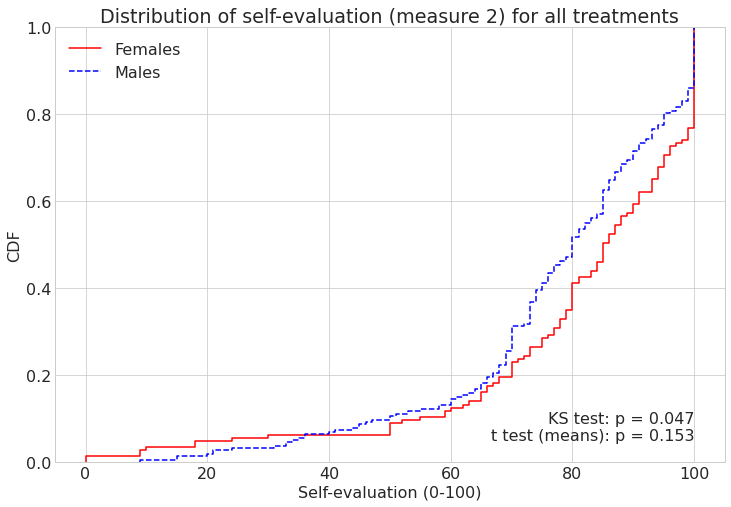

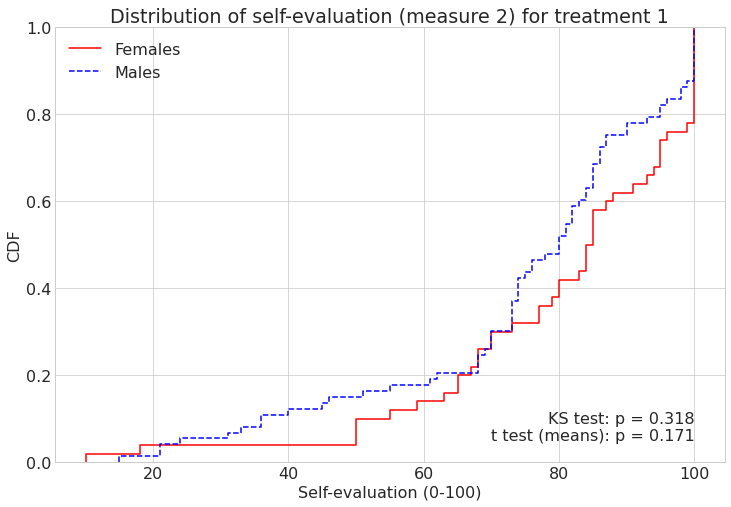

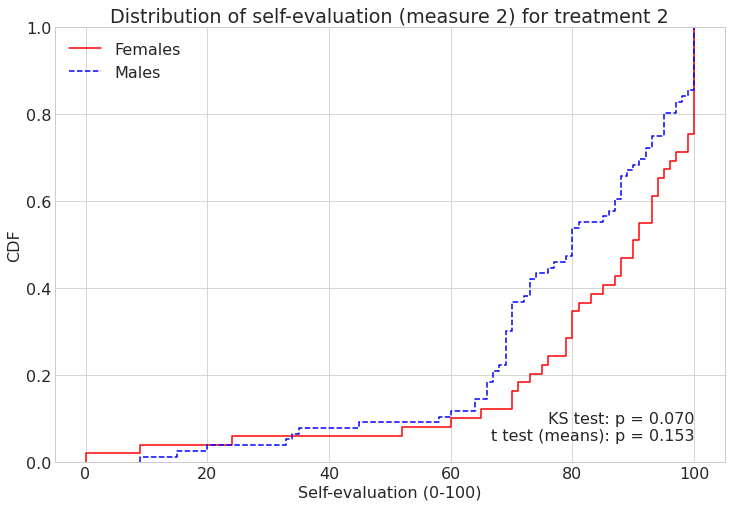

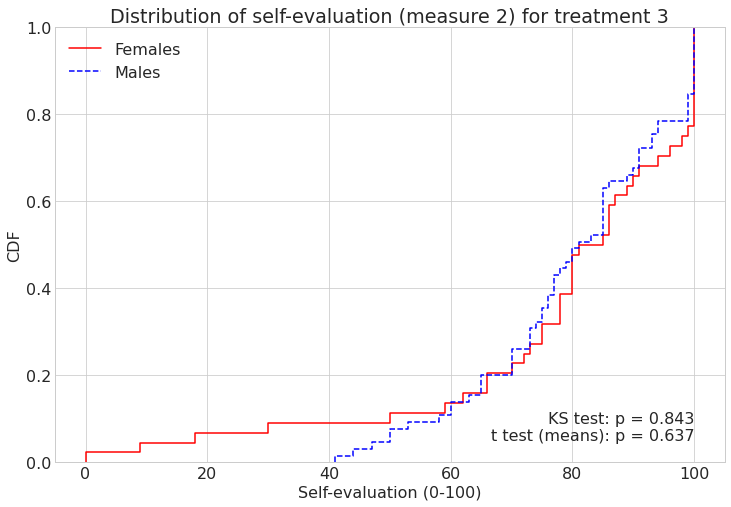

In [7]:
plot_ecdf(
        df_app['promote2'][df_app['female'] == 1],
        df_app['promote2'][df_app['female'] == 0],
    )
plt.title(f'Distribution of self-evaluation (measure 2) for all treatments')
plt.xlabel('Self-evaluation (0-100)')
plt.ylabel('CDF')
plt.show()

for treatment in (1,2,3):
    plot_ecdf(
        df_app['promote2'][(df_app['treatment'] == treatment) & (df_app['female'] == 1)],
        df_app['promote2'][(df_app['treatment'] == treatment) & (df_app['female'] == 0)],
    )
    plt.title(f'Distribution of self-evaluation (measure 2) for treatment {treatment}')
    plt.xlabel('Self-evaluation (0-100)')
    plt.ylabel('CDF')
    plt.show()

In [8]:
df_guesses = pd.read_csv("applicant_wage_guesses.csv")
df_guesses.head()

,guesser,treatment,guesser_is_female,other_is_female,promote_type_seen,other_promote1,other_promote2,other_promote3_attentive,other_promote3_boastful,other_eval_correct,wage_guess,perform_guess,approp_guess
0,0,1,0,1,3,4,16,1,0,3,0.90,NaN,3.0
1,1,1,0,1,2,2,65,0,0,3,0.90,NaN,5.0
2,2,1,0,0,1,6,44,0,1,2,1.20,NaN,3.0
3,3,1,0,0,3,6,24,0,0,1,0.65,NaN,4.0
4,4,1,0,0,3,1,83,0,0,6,0.65,NaN,4.0


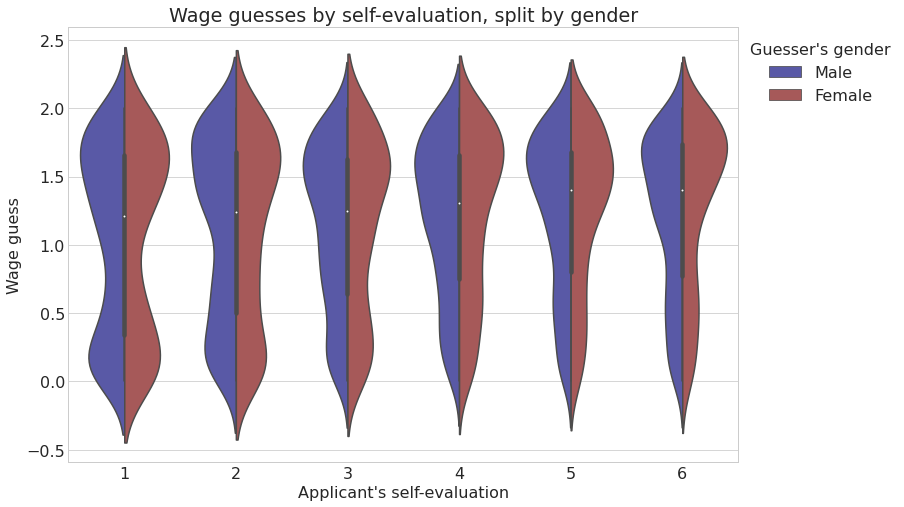

In [9]:
colors = ['blue', 'red']
styles = ['-.', '--']

p = sns.violinplot(
    data=df_guesses, x='other_promote1', y='wage_guess',
    hue='guesser_is_female', split=True,
    palette=colors, saturation=0.3,
    height = 10, aspect = 1.5,
)
p.set(xlabel='Applicant\'s self-evaluation', ylabel='Wage guess', title='Wage guesses by self-evaluation, split by gender')
p.legend(handles=p.legend_.legendHandles, labels=['Male', 'Female'], title='Guesser\'s gender', bbox_to_anchor=(1.25, 1.0))
plt.xticks(range(6), range(1,7))

plt.show()

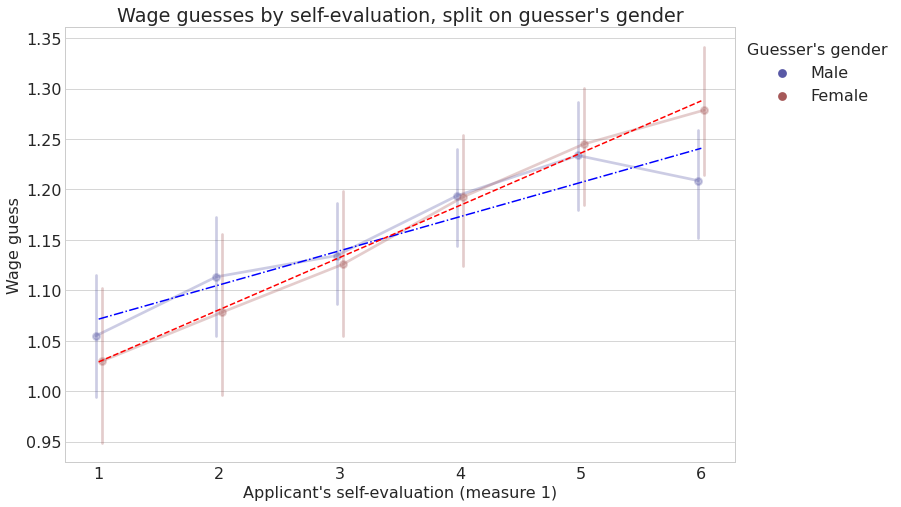

In [10]:
desat_colors = [sns.desaturate(c, 0.3) for c in colors]

p = sns.pointplot(
    data=df_guesses, x='other_promote1', y='wage_guess',
    hue='guesser_is_female',
    palette=desat_colors, errorbar='se', dodge=True
)
p.set(xlabel='Applicant\'s self-evaluation (measure 1)', ylabel='Wage guess', title='Wage guesses by self-evaluation, split on guesser\'s gender')
p.legend(handles=p.legend_.legendHandles, labels=['Male', 'Female'], title='Guesser\'s gender', bbox_to_anchor=(1.25, 1.0))
plt.setp(p.collections, alpha=0.3)
plt.setp(p.lines, alpha=0.3)
plt.xticks(range(6), range(1,7))

for is_female in (0, 1):
    df = df_guesses[df_guesses['guesser_is_female'] == is_female]
    trend = np.poly1d(np.polyfit(df['other_promote1'], df['wage_guess'], 1))
    plt.plot([0, 5], trend([1, 6]), linestyle=styles[is_female], color = colors[is_female])

plt.show()

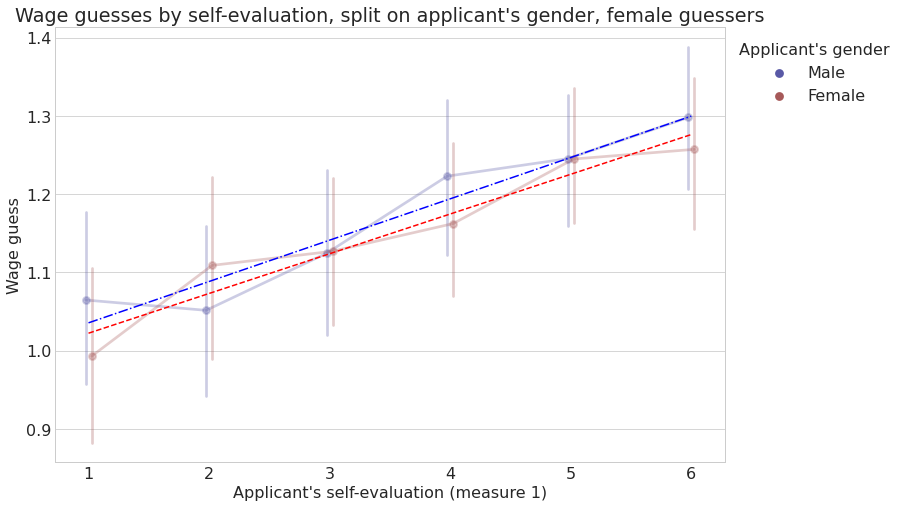

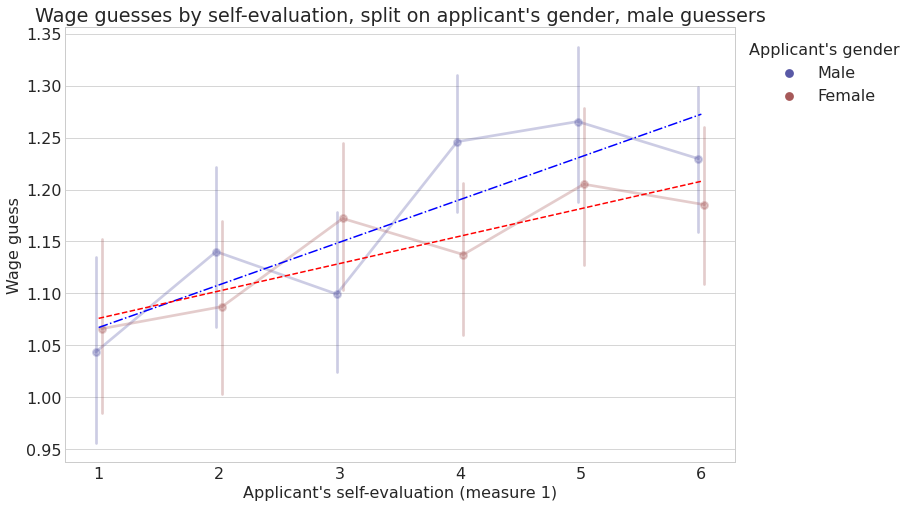

In [11]:
def plot_guesses_split_gender(fem):
    gender = 'female' if fem else 'male'
    p = sns.pointplot(
        data=df_guesses[df_guesses['guesser_is_female'] == fem], x='other_promote1', y='wage_guess',
        hue='other_is_female',
        palette=desat_colors, errorbar='se', dodge=True
    )
    p.set(xlabel='Applicant\'s self-evaluation (measure 1)', ylabel='Wage guess', title=f'Wage guesses by self-evaluation, split on applicant\'s gender, {gender} guessers')
    p.legend(handles=p.legend_.legendHandles, labels=['Male', 'Female'], title='Applicant\'s gender', bbox_to_anchor=(1.0, 1.0))
    plt.setp(p.collections, alpha=0.3)
    plt.setp(p.lines, alpha=0.3)
    plt.xticks(range(6), range(1,7))

    for is_female in (0, 1):
        df = df_guesses[(df_guesses['guesser_is_female'] == fem) & (df_guesses['other_is_female'] == is_female)]
        trend = np.poly1d(np.polyfit(df['other_promote1'], df['wage_guess'], 1))
        plt.plot([0, 5], trend([1, 6]), linestyle=styles[is_female], color = colors[is_female])

    plt.show()

plot_guesses_split_gender(1)
plot_guesses_split_gender(0)

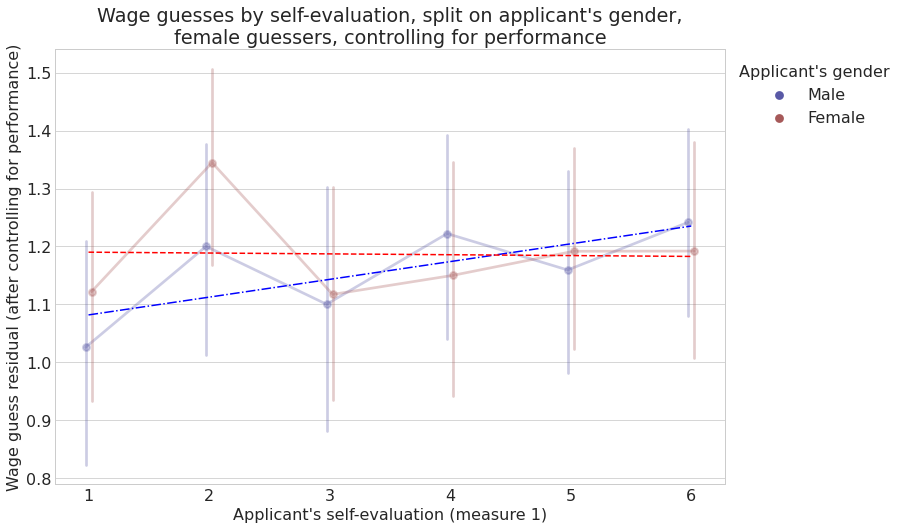

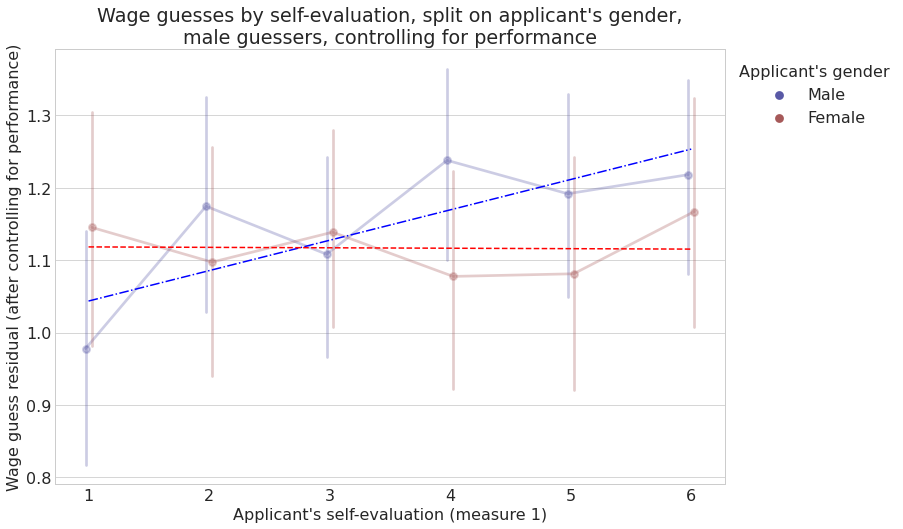

In [12]:
def plot_guesses_split_gender_controlled(fem):
    gender = 'female' if fem else 'male'
    df = df_guesses[df_guesses['treatment'] == 3]
    df['resid'] = sm.OLS(df['wage_guess'], pd.get_dummies(df['other_eval_correct'])).fit().resid
    p = sns.pointplot(
        data=df[df['guesser_is_female'] == fem], x='other_promote1', y='wage_guess',
        hue='other_is_female',
        palette=desat_colors, errorbar='se', dodge=True
    )
    p.set(
        xlabel='Applicant\'s self-evaluation (measure 1)', ylabel='Wage guess residual (after controlling for performance)',
        title=f'Wage guesses by self-evaluation, split on applicant\'s gender,\n{gender} guessers, controlling for performance'
        )
    p.legend(handles=p.legend_.legendHandles, labels=['Male', 'Female'], title='Applicant\'s gender', bbox_to_anchor=(1.0, 1.0))
    plt.setp(p.collections, alpha=0.3)
    plt.setp(p.lines, alpha=0.3)
    plt.xticks(range(6), range(1,7))

    for is_female in (0, 1):
        df_ = df[(df['guesser_is_female'] == fem) & (df['other_is_female'] == is_female)]
        trend = np.poly1d(np.polyfit(df_['other_promote1'], df_['wage_guess'], 1))
        plt.plot([0, 5], trend([1, 6]), linestyle=styles[is_female], color = colors[is_female])

    plt.show()

plot_guesses_split_gender_controlled(1)
plot_guesses_split_gender_controlled(0)

In [13]:
df_bids = pd.read_csv("employer_wage_bids.csv")
df_bids.head()

,employer,applicant,treatment,emp_is_female,app_is_female,promote_type_seen,app_promote1,app_promote2,app_promote3_attentive,app_promote3_boastful,app_eval_correct,bid,perform_guess,approp_rating
0,grevc34c,ww7q81wj,2,1,0,1,5,100,1,0,7,1.00,4,5
1,grevc34c,0c1jqwyh,2,1,0,1,3,88,1,0,4,0.20,0,1
2,grevc34c,wmu1c1q9,2,1,0,1,4,70,1,0,4,0.49,4,5
3,grevc34c,fzmpuggn,2,1,1,1,4,60,1,0,2,0.50,4,5
4,grevc34c,6u6u2dss,2,1,1,1,6,87,1,0,6,1.00,5,4


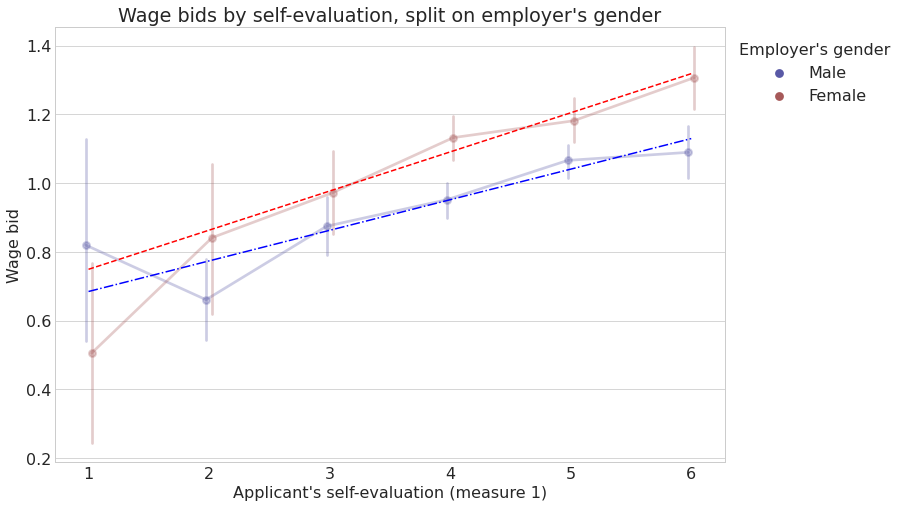

In [14]:
p = sns.pointplot(
    data=df_bids, x='app_promote1', y='bid',
    hue='emp_is_female',
    palette=desat_colors, errorbar='se', dodge=True
)
p.set(xlabel='Applicant\'s self-evaluation (measure 1)', ylabel='Wage bid', title='Wage bids by self-evaluation, split on employer\'s gender')
p.legend(handles=p.legend_.legendHandles, labels=['Male', 'Female'], title='Employer\'s gender', bbox_to_anchor=(1.0, 1.0))
plt.setp(p.collections, alpha=0.3)
plt.setp(p.lines, alpha=0.3)
plt.xticks(range(6), range(1,7))

for is_female in (0, 1):
    df = df_bids[df_bids['emp_is_female'] == is_female]
    trend = np.poly1d(np.polyfit(df['app_promote1'], df['bid'], 1))
    plt.plot([0, 5], trend([1, 6]), linestyle=styles[is_female], color = colors[is_female])

plt.show()

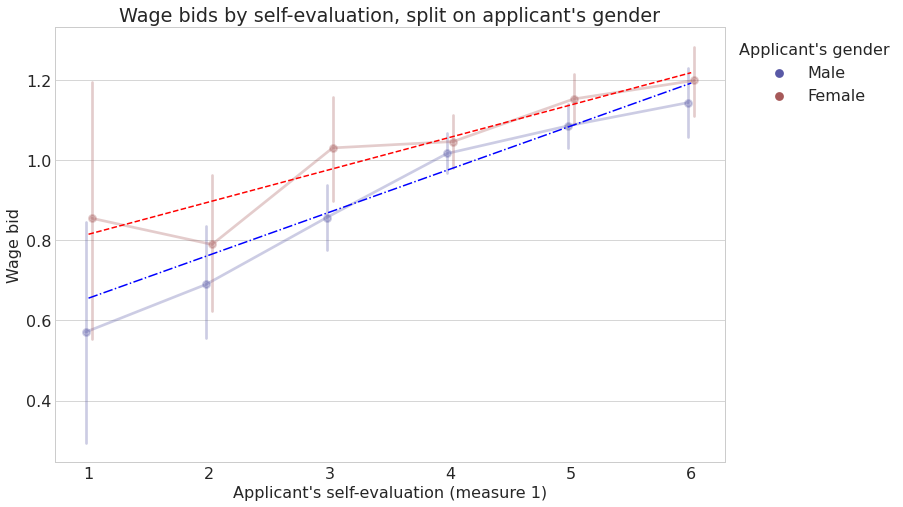

In [15]:
p = sns.pointplot(
    data=df_bids, x='app_promote1', y='bid',
    hue='app_is_female',
    palette=desat_colors, errorbar='se', dodge=True
)
p.set(xlabel='Applicant\'s self-evaluation (measure 1)', ylabel='Wage bid', title='Wage bids by self-evaluation, split on applicant\'s gender')
p.legend(handles=p.legend_.legendHandles, labels=['Male', 'Female'], title='Applicant\'s gender', bbox_to_anchor=(1.0, 1.0))
plt.setp(p.collections, alpha=0.3)
plt.setp(p.lines, alpha=0.3)
plt.xticks(range(6), range(1,7))

for is_female in (0, 1):
    df = df_bids[df_bids['app_is_female'] == is_female]
    trend = np.poly1d(np.polyfit(df['app_promote1'], df['bid'], 1))
    plt.plot([0, 5], trend([1, 6]), linestyle=styles[is_female], color = colors[is_female])

plt.show()

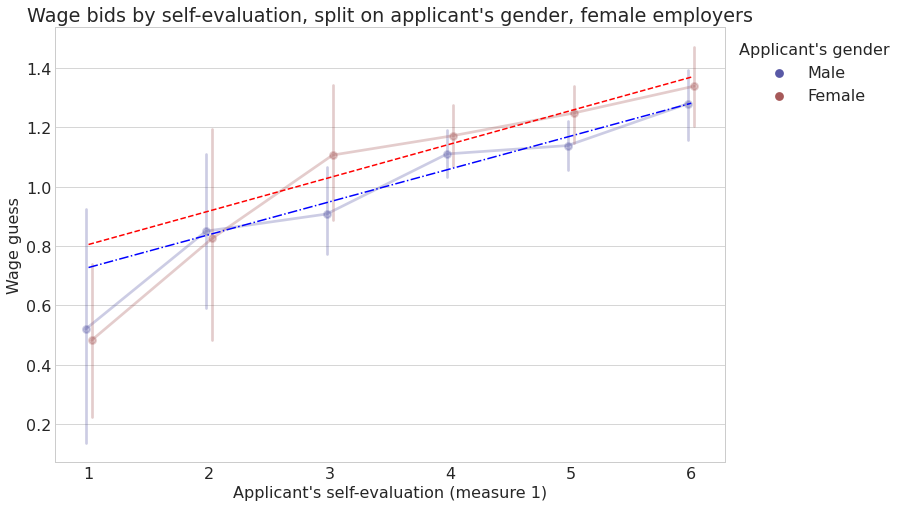

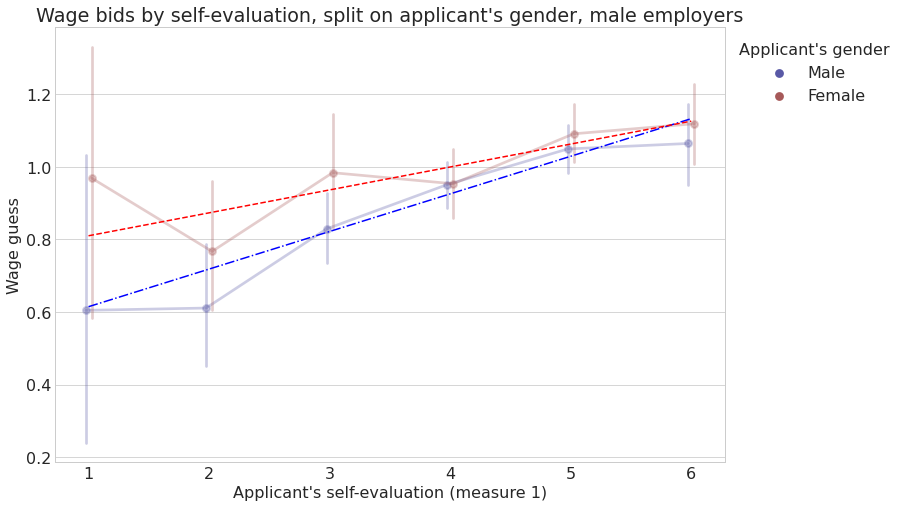

In [16]:
def plot_bids_split_gender(fem):
    gender = 'female' if fem else 'male'
    p = sns.pointplot(
        data=df_bids[df_bids['emp_is_female'] == fem], x='app_promote1', y='bid',
        hue='app_is_female',
        palette=desat_colors, errorbar='se', dodge=True
    )
    p.set(xlabel='Applicant\'s self-evaluation (measure 1)', ylabel='Wage guess', title=f'Wage bids by self-evaluation, split on applicant\'s gender, {gender} employers')
    p.legend(handles=p.legend_.legendHandles, labels=['Male', 'Female'], title='Applicant\'s gender', bbox_to_anchor=(1.0, 1.0))
    plt.setp(p.collections, alpha=0.3)
    plt.setp(p.lines, alpha=0.3)
    plt.xticks(range(6), range(1,7))

    for is_female in (0, 1):
        df = df_bids[(df_bids['emp_is_female'] == fem) & (df_bids['app_is_female'] == is_female)]
        trend = np.poly1d(np.polyfit(df['app_promote1'], df['bid'], 1))
        plt.plot([0, 5], trend([1, 6]), linestyle=styles[is_female], color = colors[is_female])

    plt.show()

plot_bids_split_gender(1)
plot_bids_split_gender(0)

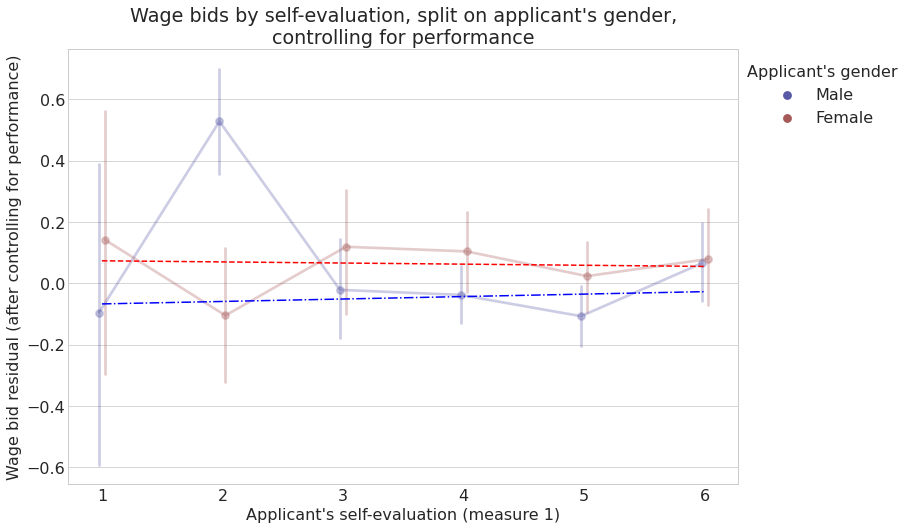

In [17]:
df = df_bids[df_bids['treatment'] == 3]
df['resid'] = sm.OLS(df['bid'], pd.get_dummies(df['app_eval_correct'])).fit().resid

p = sns.pointplot(
    data=df, x='app_promote1', y='resid',
    hue='app_is_female',
    palette=desat_colors, errorbar='se', dodge=True
)
p.set(xlabel='Applicant\'s self-evaluation (measure 1)', ylabel='Wage bid residual (after controlling for performance)', title='Wage bids by self-evaluation, split on applicant\'s gender,\ncontrolling for performance')
p.legend(handles=p.legend_.legendHandles, labels=['Male', 'Female'], title='Applicant\'s gender', bbox_to_anchor=(1.26, 1.0))
plt.setp(p.collections, alpha=0.3)
plt.setp(p.lines, alpha=0.3)
plt.xticks(range(6), range(1,7))

for is_female in (0, 1):
    df_ = df[df['app_is_female'] == is_female]
    trend = np.poly1d(np.polyfit(df_['app_promote1'], df_['resid'], 1))
    plt.plot([0, 5], trend([1, 6]), linestyle=styles[is_female], color = colors[is_female])

plt.show()